# Exemplo de utilização da regressão logística multinomial

In [42]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as skmet
import numpy as np
import seaborn as sns 

# Carregando os dados
- Vamos usar o dataset chamado de Digits

In [43]:
digits = load_digits()
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [44]:
img_data = digits["data"]
labels = digits["target"]
print("Shape dos dados:", digits["data"].shape)
print("Labels:", digits["data"].shape)

Shape dos dados: (1797, 64)
Labels: (1797, 64)


## Visualizando alguns dos dados

In [45]:
def plot_digits(digs, labels):    
    fig, axs = plt.subplots(nrows=1, ncols=len(labels), figsize=(8, 20))
    for ax, img, lab in zip(axs, digs, labels):
        ax.imshow(np.reshape(img, (8,8)), cmap=plt.cm.gray, )        
        ax.set_title(f"{lab}")
        ax.set_axis_off()

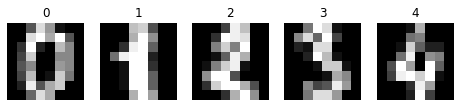

In [46]:
plot_digits(img_data[0:5], labels[0:5])

## Separando os dados

In [47]:
x_train, x_test, y_train, y_test = train_test_split(img_data, labels, test_size=0.25, random_state=13)
print(f"Numero total de imagens para treino: {x_train.shape[0]}")
print(f"Numero total de imagens para teste: {x_test.shape[0]}")

Numero total de imagens para treino: 1347
Numero total de imagens para teste: 450


# Criando uma regressão logística
- Vamos usar o método `LogisticRegression()`

In [55]:
model = LogisticRegression(max_iter=500, class_weight="balanced")
model.fit(x_train, y_train)

/home/patcha/gandalf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=500)

- Podemos obter as predições diretamente

In [56]:
preds = model.predict(x_test)
preds[0:5]

array([9, 1, 1, 3, 1])

- Mas também conseguimos obter as probabilidades

In [50]:
pred_probs = model.predict_proba(x_test)
pred_probs[0:5]

array([[9.02531904e-06, 5.86191945e-08, 2.33509543e-09, 1.93333827e-06,
        4.91909153e-13, 1.35512962e-07, 1.14274755e-09, 1.37929230e-08,
        4.21048872e-04, 9.99567781e-01],
       [1.06528333e-15, 9.99999137e-01, 5.75675524e-11, 7.92188219e-14,
        6.06430536e-07, 1.74181033e-14, 1.85646084e-09, 9.73314946e-09,
        2.45210454e-07, 1.47920340e-12],
       [3.69235190e-09, 8.26825462e-01, 1.67941952e-10, 9.22899796e-15,
        1.71395797e-01, 6.25917480e-09, 1.35508276e-06, 2.15253710e-05,
        1.75585016e-03, 5.07861785e-10],
       [8.94918502e-09, 1.18691837e-09, 5.28668224e-05, 9.53141222e-01,
        2.30773398e-09, 2.42816948e-07, 4.97642235e-09, 1.15965745e-07,
        4.64329712e-02, 3.72563305e-04],
       [2.60972063e-10, 6.89727366e-01, 2.50967759e-04, 2.01006000e-09,
        1.41963764e-04, 1.01319113e-12, 6.42228710e-09, 2.92624558e-01,
        1.72551165e-02, 1.93431744e-08]])

- Obtendo algumas métricas:

In [51]:
skmet.accuracy_score(preds, y_test)

0.9622222222222222

<AxesSubplot:>

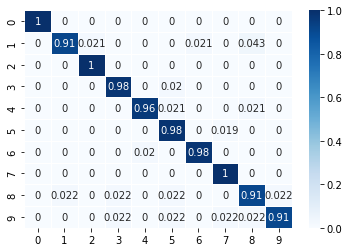

In [52]:
cm = skmet.confusion_matrix(preds, y_test, normalize='true')
sns.heatmap(cm, annot=True, cmap="Blues", linewidths=.5)

In [53]:
print(skmet.classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.98      0.91      0.95        47
           2       0.98      1.00      0.99        44
           3       0.96      0.98      0.97        50
           4       0.98      0.96      0.97        48
           5       0.93      0.98      0.95        53
           6       0.98      0.98      0.98        49
           7       0.94      1.00      0.97        34
           8       0.91      0.91      0.91        45
           9       0.98      0.91      0.94        46

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



- Mostrando classes erradas

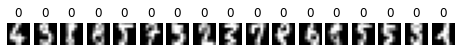

In [54]:
wrongs = x_test[preds != y_test]
w_l = [0] * wrongs.shape[0]
plot_digits(wrongs, w_l)